In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("colorblind")
import numpy as np

In [2]:
stdsaltelli5000 = pd.read_csv("data/saltelli5000std.csv")

In [3]:
stdsaltelli5000["Var"][0] = "N"
stdsaltelli5000 = stdsaltelli5000.set_index("Var")


/home/marcelomaciel/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
stdsaltelli5000

S1   S1_conf        ST   ST_conf
Var                                             
N         0.004881  0.006388  0.022210  0.003495
n_issues  0.186464  0.025251  0.234629  0.014013
p         0.063561  0.015413  0.115790  0.009160
σ         0.462022  0.035358  0.576110  0.029141
ρ         0.129280  0.018281  0.242048  0.016394
p_intran  0.000949  0.004267  0.011563  0.001754

In [43]:
((stdsaltelli5000["ST"].loc["n_issues"] + 
  stdsaltelli5000["ST"].loc["ρ"]) +
 stdsaltelli5000["ST"].loc["σ"])

1.052786824775237

In [31]:
stdsaltelli5000["S1"].sum()

0.8471577595513162

In [44]:
stdsaltelli5000["ST"].sum()

1.2023498550005995

In [33]:
stdsaltelli5000["ST"].sum() - stdsaltelli5000["S1"].sum()

0.3551920954492833

In [4]:
print(stdsaltelli5000.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &        S1 &   S1\_conf &        ST &   ST\_conf \\
Var      &           &           &           &           \\
\midrule
N        &  0.004881 &  0.006388 &  0.022210 &  0.003495 \\
n\_issues &  0.186464 &  0.025251 &  0.234629 &  0.014013 \\
p        &  0.063561 &  0.015413 &  0.115790 &  0.009160 \\
σ        &  0.462022 &  0.035358 &  0.576110 &  0.029141 \\
ρ        &  0.129280 &  0.018281 &  0.242048 &  0.016394 \\
p\_intran &  0.000949 &  0.004267 &  0.011563 &  0.001754 \\
\bottomrule
\end{tabular}



In [5]:
indices_5000 = stdsaltelli5000[['S1','ST']]
err_5000 = stdsaltelli5000[['S1_conf','ST_conf']]

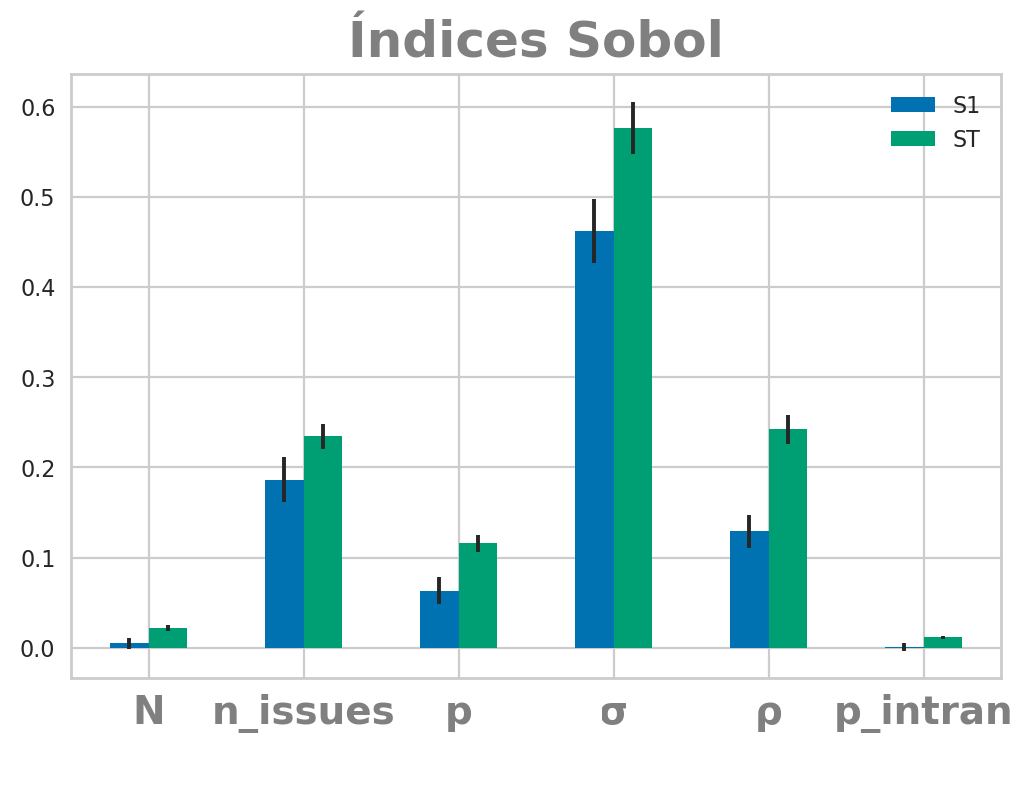

In [6]:
fig, ax = plt.subplots(1, dpi = 200)
indices_5000.plot.bar(yerr=err_5000.values.T,ax=ax)
plt.xticks(rotation = "horizontal",  fontsize = 14, color = "gray", fontweight= "bold")
# ax.set_ylabel("Impacto", labelpad = 5,  fontsize = 14, color = "gray", fontweight= "bold")
ax.set_xlabel(" ")
ax.set_title("Índices Sobol", fontsize = 18, color = "gray", fontweight= "bold")

plt.savefig("image/barplotmuto5k.png", dpi = 200)
plt.show()

In [7]:
df_5000 = pd.read_csv("data/5000paramsandresults.csv")

In [8]:
Y = df_5000["Ystd"]

In [9]:
df_5000

N  n_issues         p         σ         ρ  p_intran      Ystd
0      1489         2  0.561514  0.341611  0.028027  0.272168  0.074214
1       707         2  0.561514  0.341611  0.028027  0.272168  0.072316
2      1489         9  0.561514  0.341611  0.028027  0.272168  0.019856
3      1489         2  0.545869  0.341611  0.028027  0.272168  0.072700
4      1489         2  0.561514  0.043975  0.028027  0.272168  0.189817
5      1489         2  0.561514  0.341611  0.008496  0.272168  0.068115
6      1489         2  0.561514  0.341611  0.028027  0.076465  0.045495
7      1489         9  0.545869  0.043975  0.008496  0.076465  0.191698
8       707         2  0.545869  0.043975  0.008496  0.076465  0.207932
9       707         9  0.561514  0.043975  0.008496  0.076465  0.181332
10      707         9  0.545869  0.341611  0.008496  0.076465  0.009246
11      707         9  0.545869  0.043975  0.028027  0.076465  0.129706
12      707         9  0.545869  0.043975  0.008496  0.272168  0.175996
13      707         9  0.545869  0.043975  0.008496  0.076465  0.174368
14     3739         6  0.116514  0.096611  0.078027  0.122168  0.144204
15     2957         6  0.116514  0.096611  0.078027  0.122168  0.136437
16     3739         5  0.116514  0.096611  0.078027  0.122168  0.148136
17     3739         6  0.100869  0.096611  0.078027  0.122168  0.147918
18     3739         6  0.116514  0.288975  0.078027  0.122168  0.115375
19     3739         6  0.116514  0.096611  0.058496  0.122168  0.160641
20     3739         6  0.116514  0.096611  0.078027  0.226465  0.141548
21     3739         5  0.100869  0.288975  0.058496  0.226465  0.117564
22     2957         6  0.100869  0.288975  0.058496  0.226465  0.106902
23     2957         5  0.116514  0.288975  0.058496  0.226465  0.102452
24     2957         5  0.100869  0.096611  0.058496  0.226465  0.153870
25     2957         5  0.100869  0.288975  0.078027  0.226465  0.127683
26     2957         5  0.100869  0.288975  0.058496  0.122168  0.114215
27     2957         5  0.100869  0.288975  0.058496  0.226465  0.111245
28     4864         4  0.784014  0.464111  0.053027  0.047168  0.041139
29     1832         4  0.784014  0.464111  0.053027  0.047168  0.040724
...     ...       ...       ...       ...       ...       ...       ...
69970  3845        10  0.880814  0.357462  0.076160  0.215149  0.036480
69971  3845        10  0.880814  0.357462  0.076160  0.276379  0.037106
69972  3228         5  0.574877  0.435341  0.064197  0.290149  0.052954
69973  2720         5  0.574877  0.435341  0.064197  0.290149  0.052102
69974  3228         8  0.574877  0.435341  0.064197  0.290149  0.039928
69975  3228         5  0.658314  0.435341  0.064197  0.290149  0.051214
69976  3228         5  0.574877  0.479962  0.064197  0.290149  0.053225
69977  3228         5  0.574877  0.435341  0.051160  0.290149  0.044705
69978  3228         5  0.574877  0.435341  0.064197  0.201379  0.051735
69979  3228         8  0.658314  0.479962  0.051160  0.201379  0.031012
69980  2720         5  0.658314  0.479962  0.051160  0.201379  0.041133
69981  2720         8  0.574877  0.479962  0.051160  0.201379  0.032203
69982  2720         8  0.658314  0.435341  0.051160  0.201379  0.030410
69983  2720         8  0.658314  0.479962  0.064197  0.201379  0.038128
69984  2720         8  0.658314  0.479962  0.051160  0.290149  0.031663
69985  2720         8  0.658314  0.479962  0.051160  0.201379  0.030911
69986   978        10  0.129877  0.190341  0.014197  0.140149  0.013860
69987  4970        10  0.129877  0.190341  0.014197  0.140149  0.141155
69988   978         3  0.129877  0.190341  0.014197  0.140149  0.033802
69989   978        10  0.213314  0.190341  0.014197  0.140149  0.011880
69990   978        10  0.129877  0.234962  0.014197  0.140149  0.014111
69991   978        10  0.129877  0.190341  0.001160  0.140149  0.008869
69992   978        10  0.129877  0.190341  0.014197  0.051379  0.011241
69993   978         3  0.213314  0.234962  0.00116

/home/marcelomaciel/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


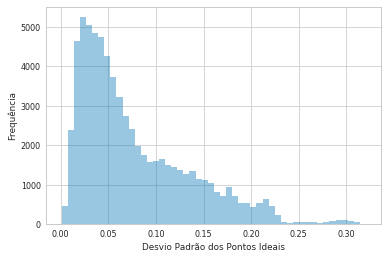

In [10]:
sns.distplot(Y, kde = False)
plt.ylabel("Frequência")
plt.xlabel("Desvio Padrão dos Pontos Ideais")
plt.savefig("image/distY.png", dpi = 200)
plt.show()


In [11]:
initcondf = pd.read_csv("data/saltelli70kinitcond.csv")

In [12]:
initcondf

std  nips
0      0.233321  1489
1      0.228831   707
2      0.231537  1489
3      0.236865  1489
4      0.235505  1489
5      0.234149  1489
6      0.230920  1489
7      0.224431  1489
8      0.231392   707
9      0.234229   707
10     0.233216   707
11     0.229926   707
12     0.231774   707
13     0.231371   707
14     0.230261  3739
15     0.231944  2957
16     0.231773  3739
17     0.231910  3739
18     0.232525  3739
19     0.231519  3739
20     0.232379  3739
21     0.230511  3739
22     0.231861  2957
23     0.231816  2957
24     0.230430  2957
25     0.233023  2957
26     0.229605  2957
27     0.231123  2957
28     0.233337  4864
29     0.232311  1832
...         ...   ...
69970  0.233562  3845
69971  0.230363  3845
69972  0.231653  3228
69973  0.232774  2720
69974  0.230035  3228
69975  0.229018  3228
69976  0.233003  3228
69977  0.230296  3228
69978  0.232270  3228
69979  0.229384  3228
69980  0.231360  2720
69981  0.229535  2720
69982  0.232672  2720
69983  0.231280  2720
69984  0.233035  2720
69985  0.232499  2720
69986  0.233475   978
69987  0.229812  4970
69988  0.235070   978
69989  0.231080   978
69990  0.231349   978
69991  0.226479   978
69992  0.235573   978
69993  0.230450   978
69994  0.231114  4970
69995  0.232265  4970
69996  0.231310  4970
69997  0.229950  4970
69998  0.233370  4970
69999  0.232829  4970

[70000 rows x 2 columns]

In [13]:
initcondf["std"]

0        0.233321
1        0.228831
2        0.231537
3        0.236865
4        0.235505
5        0.234149
6        0.230920
7        0.224431
8        0.231392
9        0.234229
10       0.233216
11       0.229926
12       0.231774
13       0.231371
14       0.230261
15       0.231944
16       0.231773
17       0.231910
18       0.232525
19       0.231519
20       0.232379
21       0.230511
22       0.231861
23       0.231816
24       0.230430
25       0.233023
26       0.229605
27       0.231123
28       0.233337
29       0.232311
           ...   
69970    0.233562
69971    0.230363
69972    0.231653
69973    0.232774
69974    0.230035
69975    0.229018
69976    0.233003
69977    0.230296
69978    0.232270
69979    0.229384
69980    0.231360
69981    0.229535
69982    0.232672
69983    0.231280
69984    0.233035
69985    0.232499
69986    0.233475
69987    0.229812
69988    0.235070
69989    0.231080
69990    0.231349
69991    0.226479
69992    0.235573
69993    0.230450
69994    0

/home/marcelomaciel/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


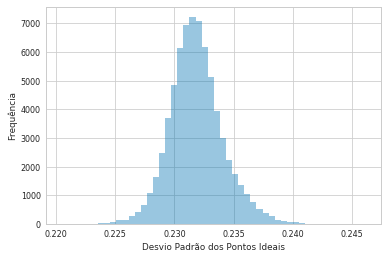

In [14]:
sns.distplot(initcondf["std"], kde = False)
plt.ylabel("Frequência")
plt.xlabel("Desvio Padrão dos Pontos Ideais")
plt.savefig("image/diststdinit.png", dpi = 200)
plt.show()


In [15]:
"""
g = sns.PairGrid(mutodf, y_vars=["Ystd"], x_vars=["N", "n_issues", "p", "σ", "ρ"])
g.map(sns.regplot, color='k',scatter_kws={'alpha':0.2, 's':4, 'color':'gray'})
#plt.suptitle("Regressão")
#plt.subplots_adjust(top=0.85)
g.savefig("image/regressionplot.png", dpi = 300)
"""


'\ng = sns.PairGrid(mutodf, y_vars=["Ystd"], x_vars=["N", "n_issues", "p", "σ", "ρ"])\ng.map(sns.regplot, color=\'k\',scatter_kws={\'alpha\':0.2, \'s\':4, \'color\':\'gray\'})\n#plt.suptitle("Regressão")\n#plt.subplots_adjust(top=0.85)\ng.savefig("image/regressionplot.png", dpi = 300)\n'

In [28]:
def saveregressionplot(df,xvar,yvar = "Ystd", typesim = "mutatingo"):

    fig1, ax1 = plt.subplots(1, dpi = 200)
    sns.regplot(xvar, yvar, data = df, scatter_kws={'alpha':0.2, 's':4, 'color':'gray'}, color='k')
    ax1.set_xlabel(xvar,  fontsize = 12, color = "gray", fontweight= "bold")
    ax1.set_ylabel(yvar,  fontsize = 12, color = "gray", fontweight= "bold")
    plt.savefig("image/regression{}{}.png".format(typesim,xvar), dpi = 200)
    

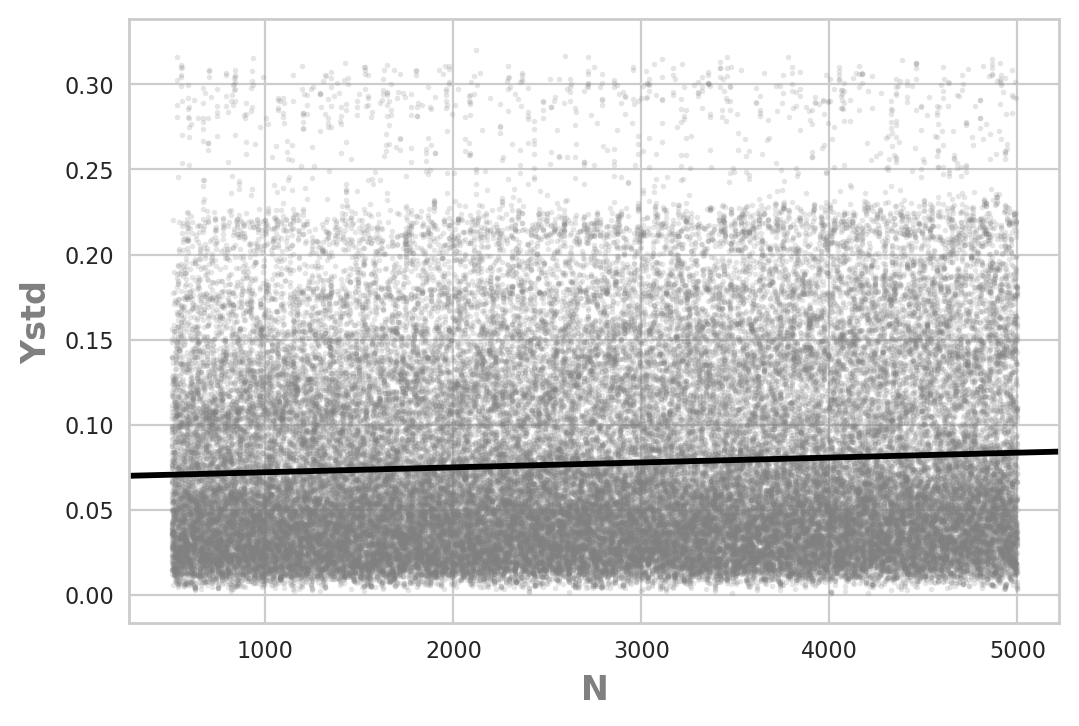

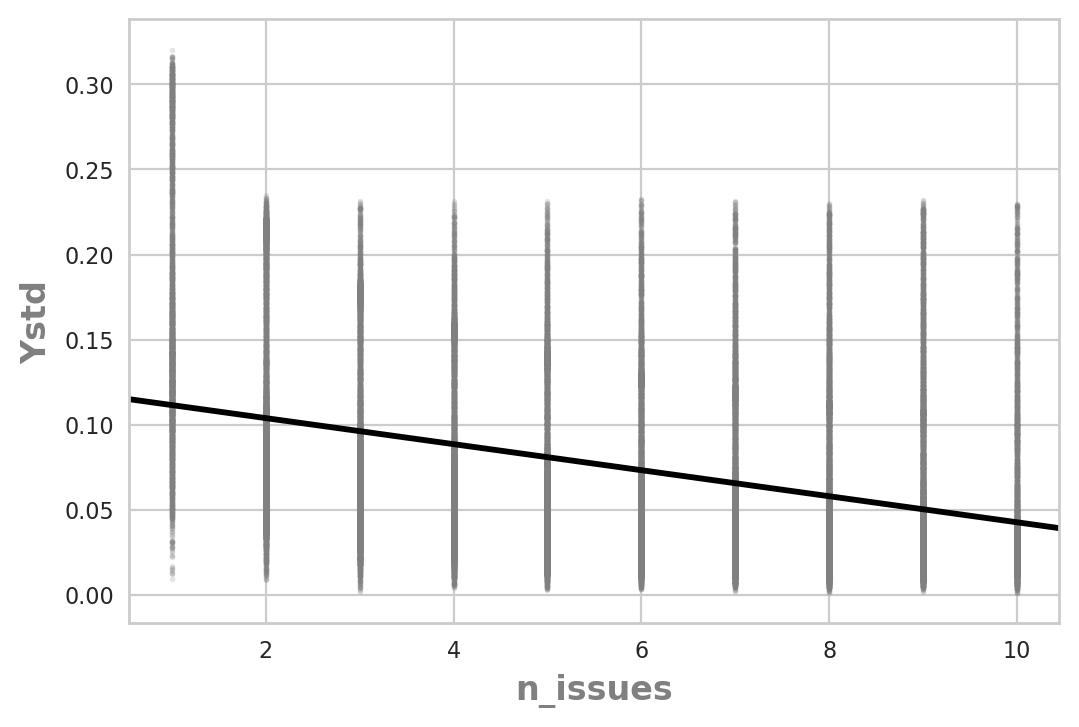

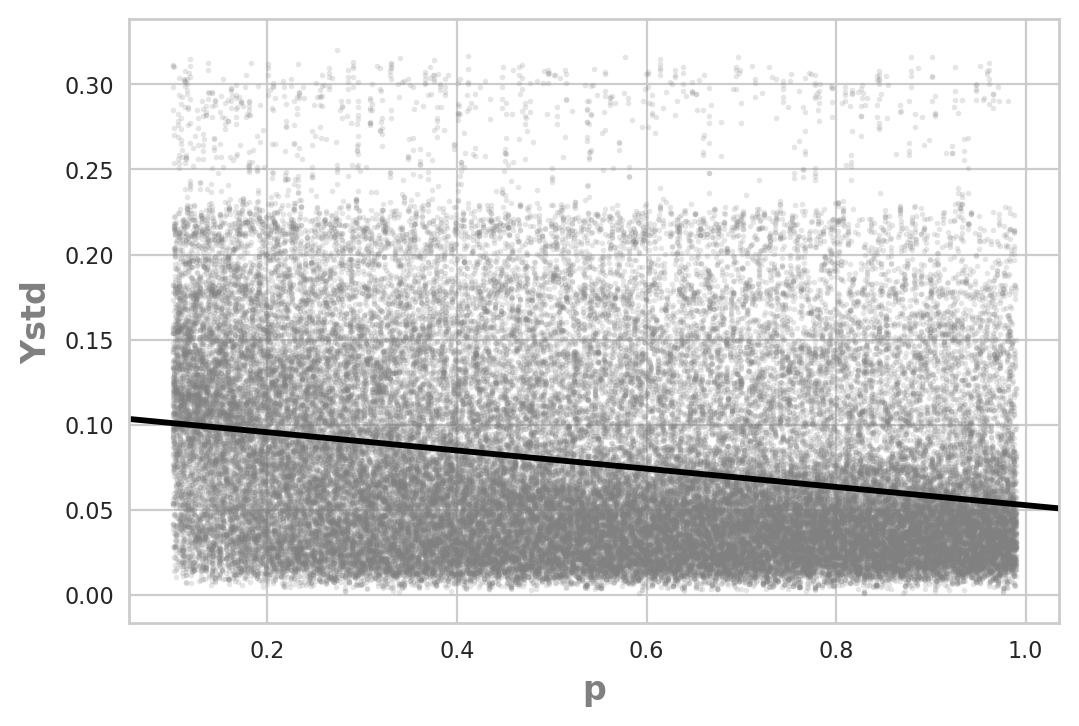

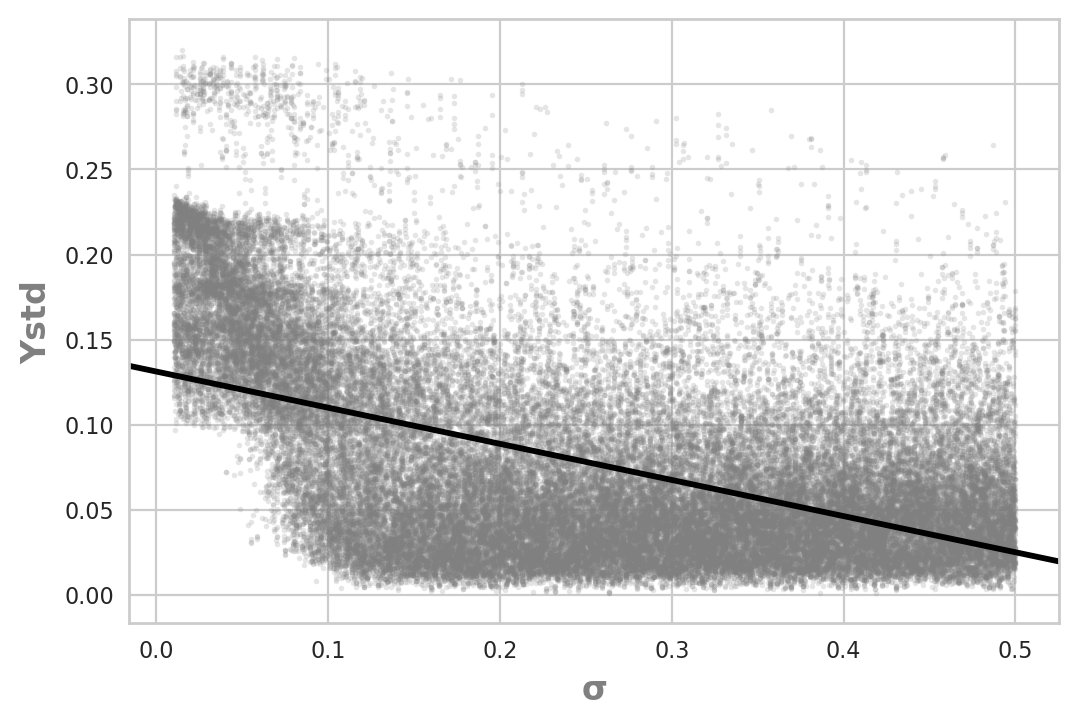

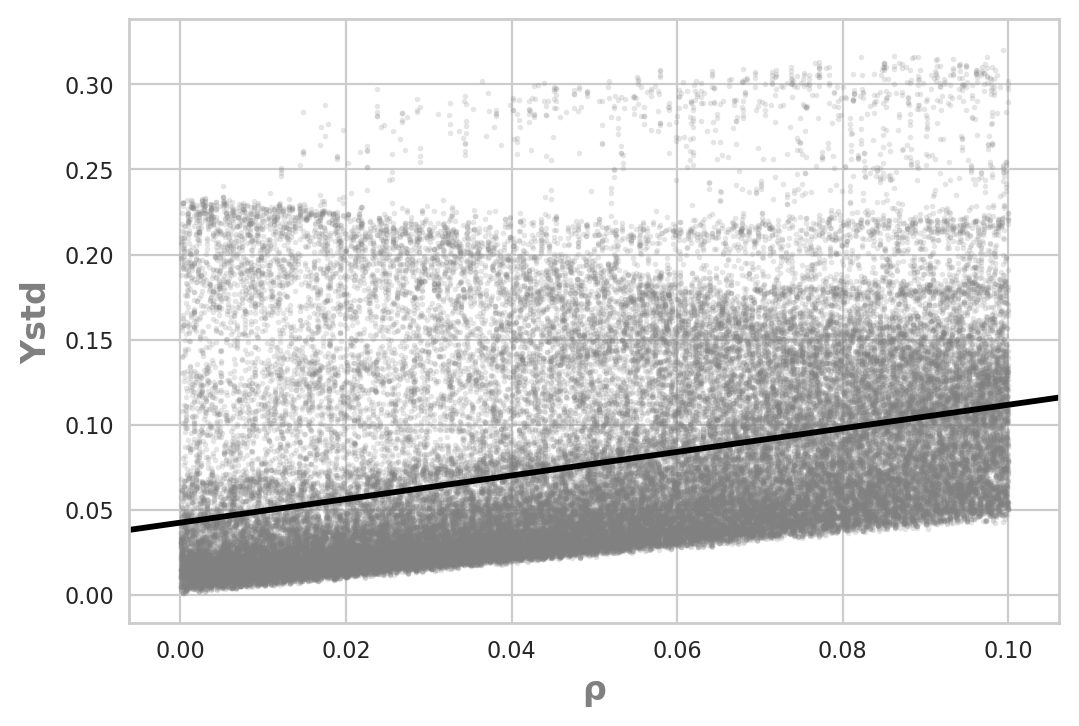

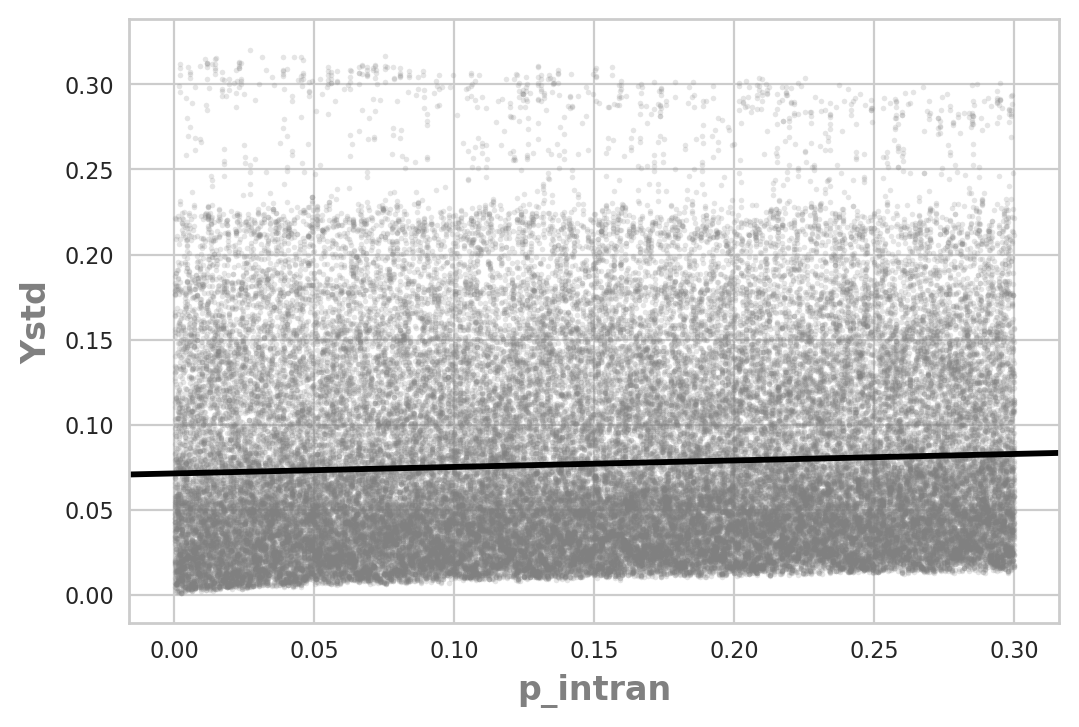

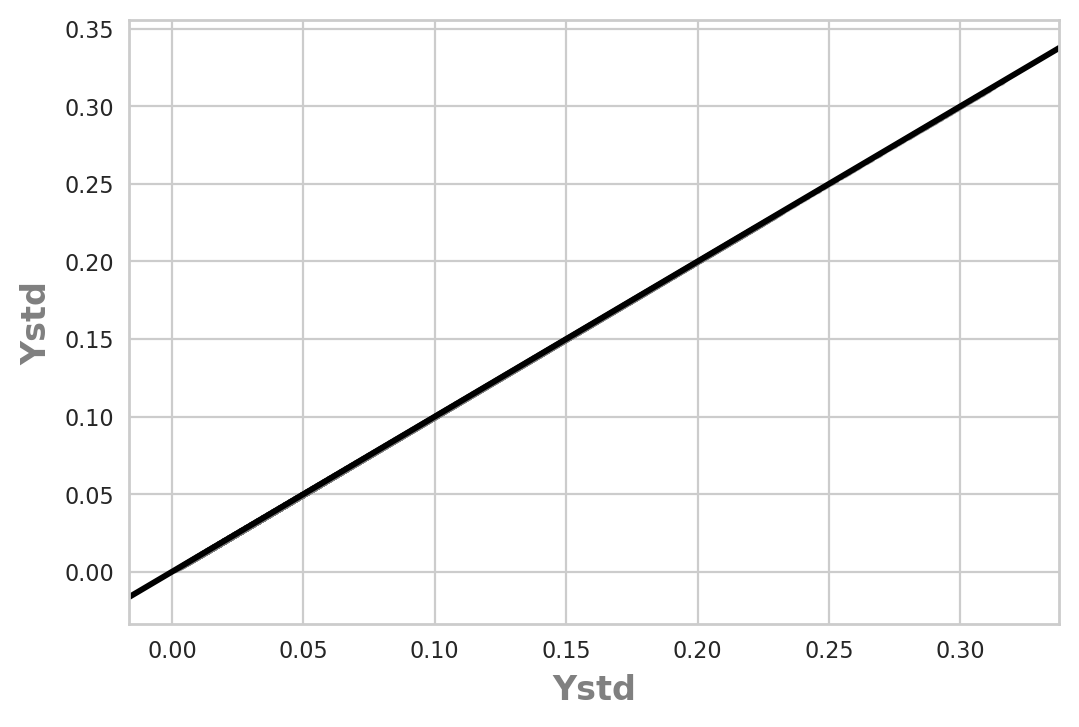

In [29]:
for i in list(df_5000.columns.values):
    saveregressionplot(df_5000,i)

In [10]:
list(df_5000.columns.values)

['N', 'n_issues', 'p', 'σ', 'ρ', 'p_intran', 'Ystd']

In [7]:
df_5000.columns.values[3]

'σ'

In [17]:
def savenlregplot(df,xvar,yvar = "Ystd", typesim = "mutatingo"):

    fig1, ax1 = plt.subplots(1, dpi = 200)
    sns.regplot(xvar, yvar, data = df, scatter_kws={'alpha':0.2, 's':4, 'color':'gray'}, color='k', order = 3 )
    ax1.set_xlabel(xvar,  fontsize = 12, color = "gray", fontweight= "bold")
    ax1.set_ylabel(yvar,  fontsize = 12, color = "gray", fontweight= "bold")
    plt.savefig("image/nlregression{}{}.png".format(typesim,xvar), dpi = 200)

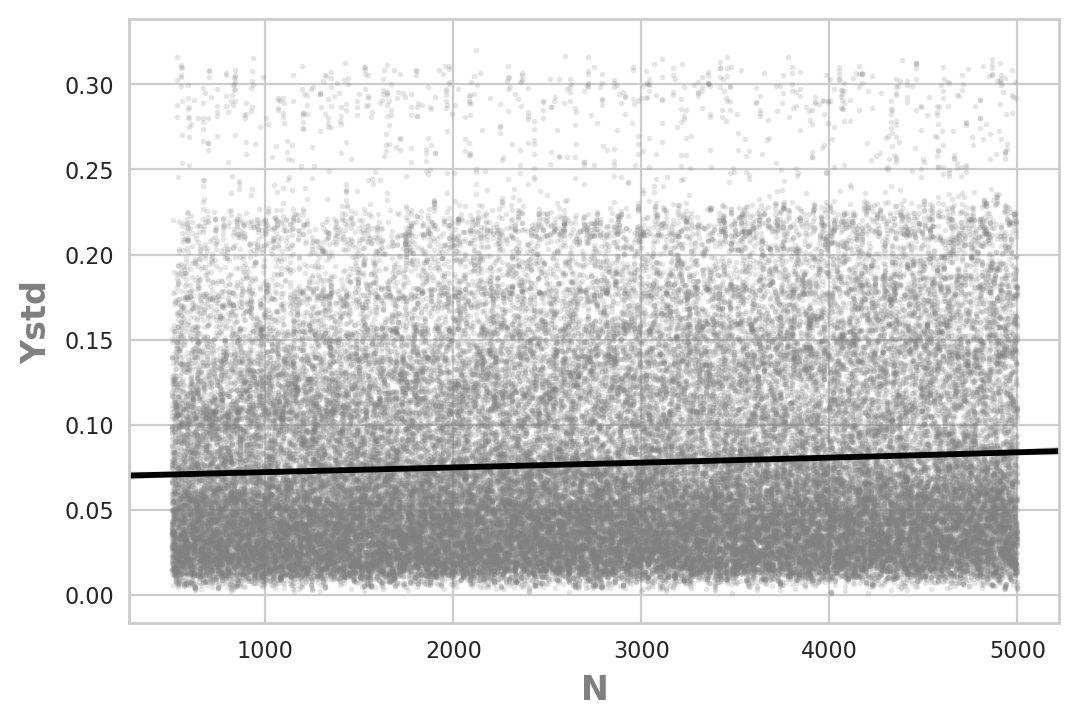

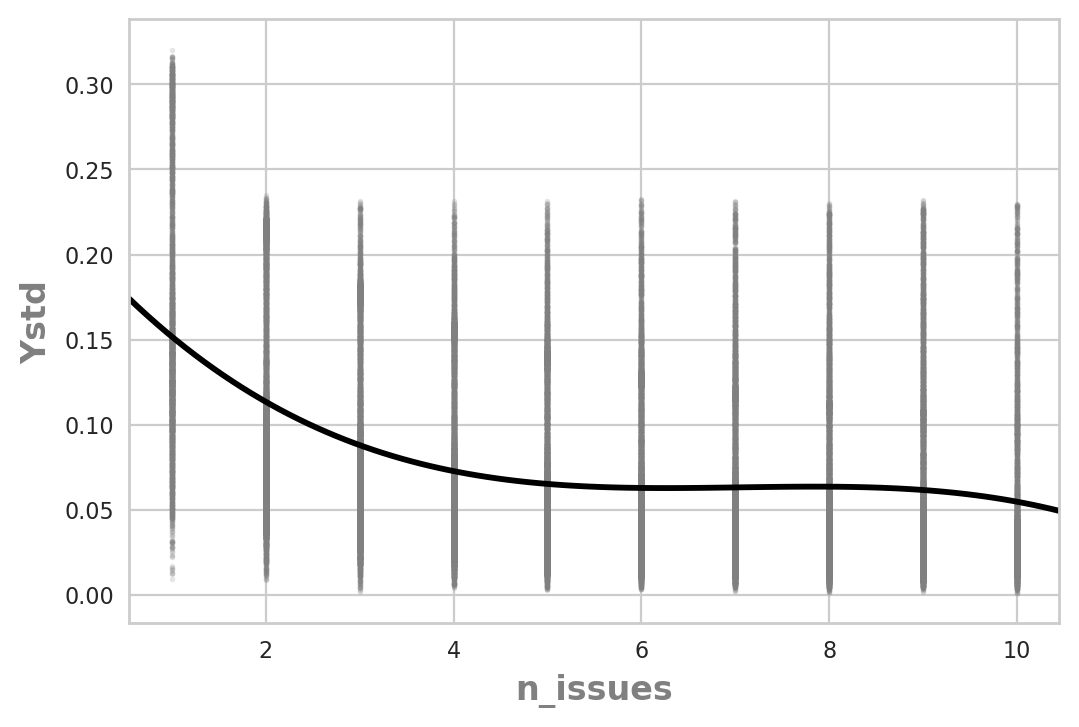

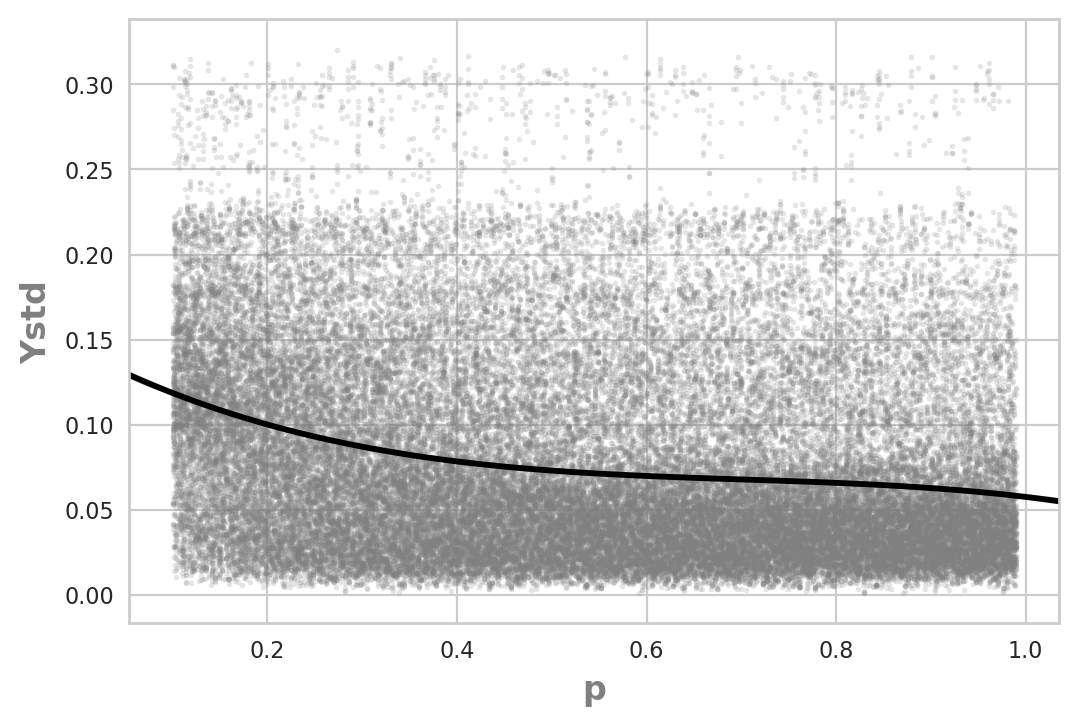

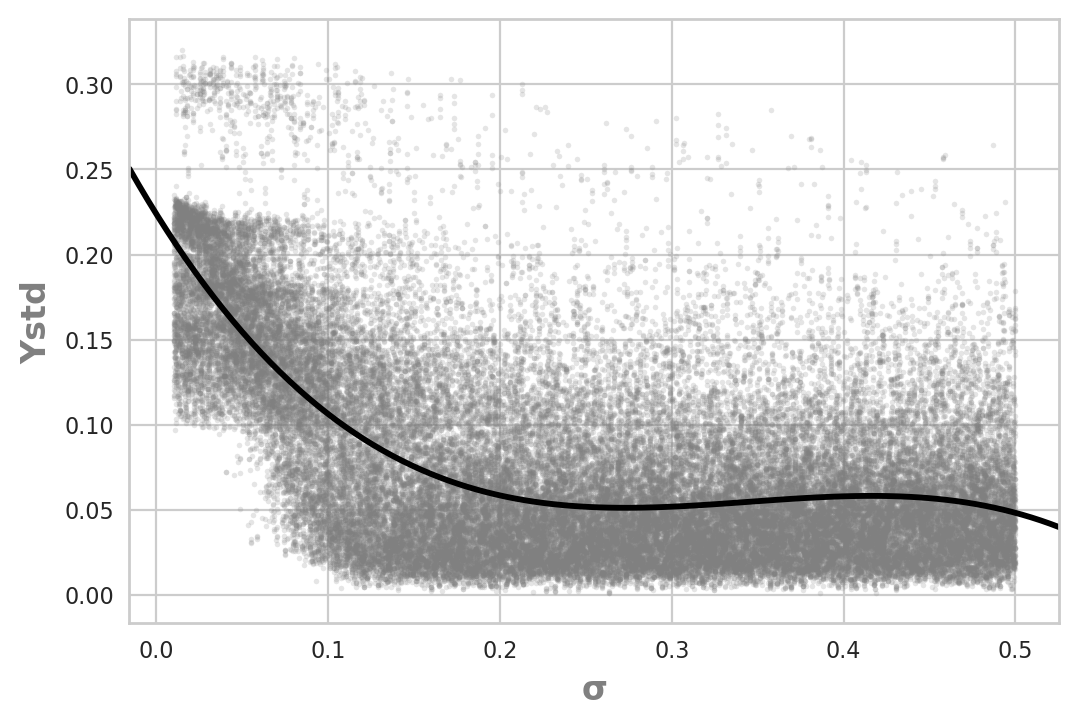

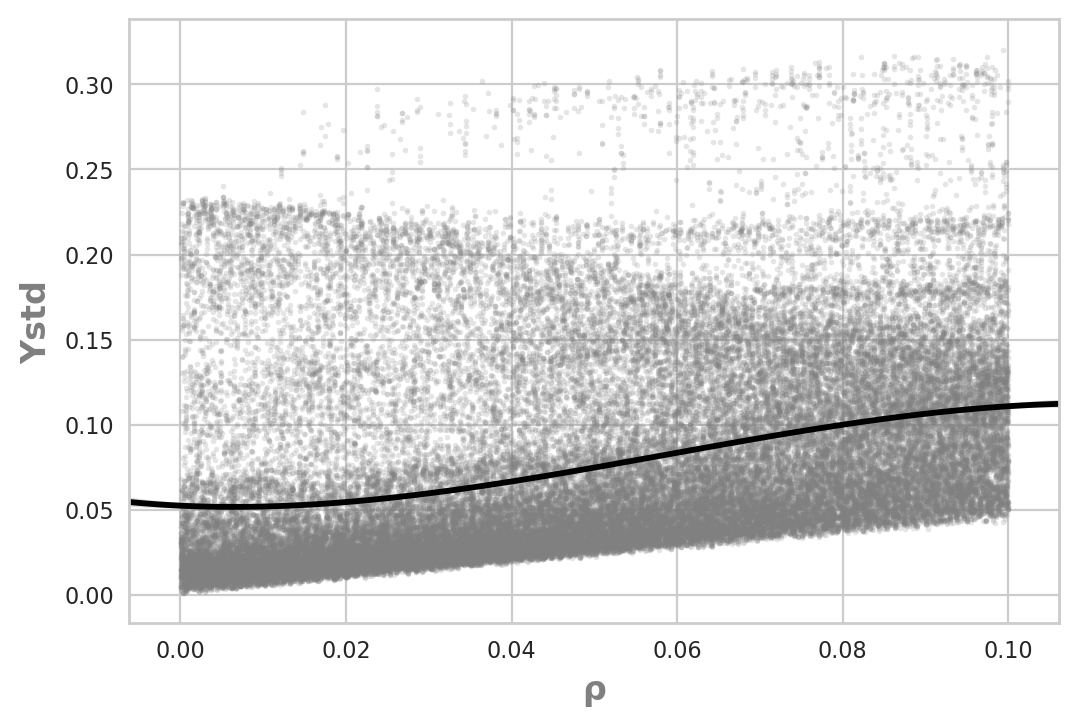

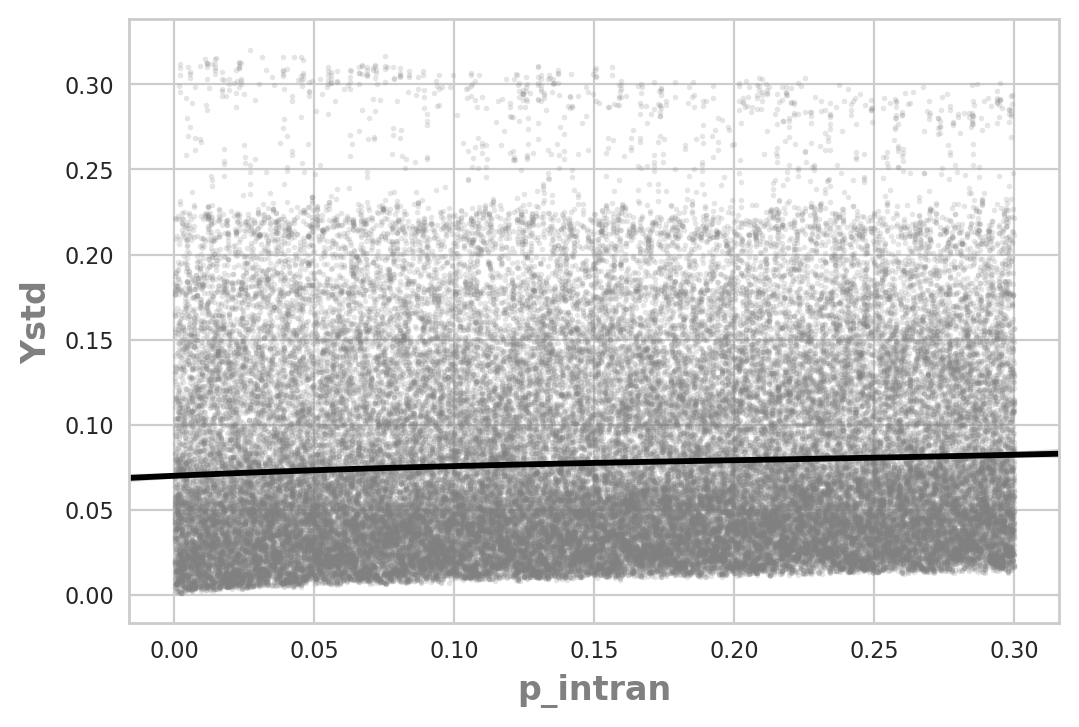

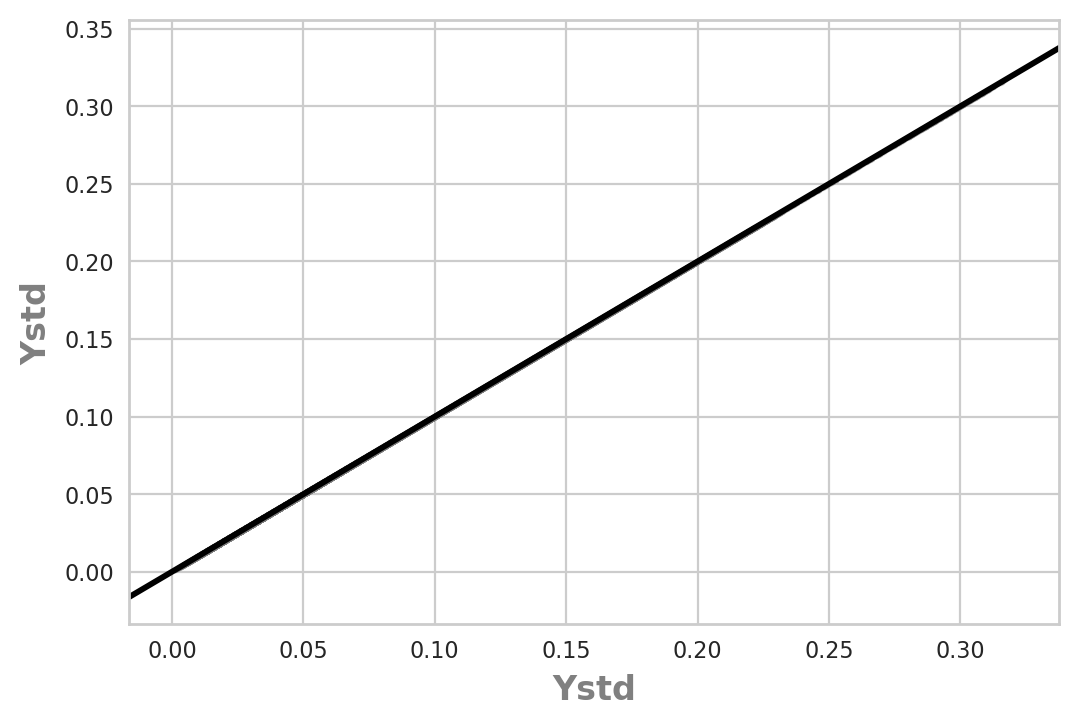

In [18]:
for i in list(df_5000.columns.values):
    savenlregplot(df_5000,i)